<a href="https://colab.research.google.com/github/aiambo08/IA/blob/main/Metaheur%C3%ADsticas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### PRÁCTICA IA: METAHEURÍSTICAS - Eduard Gámez, Martín Kugler & Aibo Ni



### Práctica de Metaheurísticas

Se buscarán soluciones al problema del viajante de comercio (TSP) para las poblaciones de la Comunidad de Madrid.

Parte obligatoria:
  * Construcción con algoritmo greedy.
  * Búsqueda local, best improvement y first improvement.
  * Iterated Local Search.

Mejoras opcionales:
  * Implementar el operador two_opt.
  * Añadir temple simulado.
  * Búsqueda GRASP.
  * Implementar algún otro problema.

In [ ]:
# definición del TSP

import random
N = 10

# cities = []

# for i in range(N):
# 	c = [random.random(), random.random()]
# 	cities.append(c)

# print(cities)

cities = [[0.8744058793117488, 0.30207179832703746], [0.6901572276474558, 0.8203362566663311], [0.7793458478083026, 0.09728979746351918], [0.7483358474304422, 0.4563419482458657], [0.4556164527790729, 0.12863149772605698], [0.1837236688553453, 0.23773749495644914], [0.806151832654163, 0.3288366900529254], [0.6222702185205219, 0.6019431085670109], [0.21886861543988367, 0.6980104036528004], [0.9706096813038716, 0.054871876245520146], [0.13881496219356027, 0.048489530185603646], [0.08511086492841424, 0.9123075505436051], [0.45436952164297595, 0.4731540740573398], [0.8986352255038935, 0.5116579750591849], [0.9539248970461742, 0.7530784036308166], [0.6321102985156373, 0.13575967095580344], [0.31130918313591205, 0.8545457319320597], [0.025897479791937017, 0.7854526665590987], [0.31414095045738066, 0.051421702103483846], [0.2739561013272712, 0.1970964027924862], [0.22762328443470214, 0.627414210742153], [0.44920042912037383, 0.18835427573438068], [0.2793138301174244, 0.9103956650199608], [0.005128451667189338, 0.4655718085045638], [0.9222718335261915, 0.8613103704784812], [0.49352498279326595, 0.28652416807644077], [0.5560886356057152, 0.034564925228364185], [0.0048939219846825255, 0.8635350555457212], [0.7824462381771976, 0.09355415747424733], [0.2973635133076785, 0.037580527218207815], [0.659068210692151, 0.5602321147981546], [0.43549418718677035, 0.6241289474799954], [0.25580657871099755, 0.519726015381631], [0.5950780852425872, 0.3193476592023645], [0.15763623266223903, 0.18210618406479095], [0.3434173147566393, 0.32992255868483356], [0.06451313705472006, 0.12606114349173192], [0.23212286400737547, 0.3945559700824013], [0.955507285594692, 0.02296933408938162], [0.7459955912073274, 0.1385374827130177], [0.46365765315595475, 0.6132297411379687], [0.20196772698059162, 0.046358747430397584], [0.2980093518214506, 0.36041197123227897], [0.7533459401199348, 0.6610562232191091], [0.323433933838161, 0.5068337090138902], [0.062138830138457, 0.7177455044259695], [0.47467832142010535, 0.17692718986260936], [0.2415634321550142, 0.500852093941769], [0.3441878827094532, 0.2604351258948506], [0.5445252142594251, 0.7295590645635646], [0.25391391610860914, 0.7641244059389684], [0.2630560480211699, 0.010670642241309536], [0.2092202940037915, 0.7415775443241935], [0.0031474687633804566, 0.6974574785842637], [0.4952329615559806, 0.9311775894780175], [0.1978488658972426, 0.8872693649066419], [0.1705364411799497, 0.8846808176103278], [0.7634962513234275, 0.4358457309207533], [0.9259752834140167, 0.0056226911773098465], [0.22090405091557253, 0.14500040130773872], [0.4636205151855679, 0.19249574424477278], [0.8057632881682811, 0.250168118157608], [0.6785236695642043, 0.39119477830554505], [0.4837264739606879, 0.23045417711558214], [0.8786721718893166, 0.015853186240832207], [0.1263309724872509, 0.9185321014517236], [0.24969404380600335, 0.9600467657522086], [0.5886119367943214, 0.10948123668473264], [0.13373527735293878, 0.5336853876899833], [0.5642696742735989, 0.9801384844337597], [0.646401605512568, 0.3338636388089157], [0.05603526365085032, 0.3149530712641142], [0.387141492676661, 0.5792852545912592], [0.8634070619751958, 0.8206820685065667], [0.4662474858565825, 0.32647667516764145], [0.01801973379815025, 0.12175434785651695], [0.6218125565554127, 0.07860046445444713], [0.6573938922925594, 0.5023092428939168], [0.2837581848186974, 0.02576704782244421], [0.3044774374252185, 0.7310313422019327], [0.33131673439274434, 0.693896434962478], [0.8523694048117944, 0.2805224723356823], [0.6200019812032047, 0.03989814578273998], [0.5437394088109648, 0.3258031129949792], [0.4386079860370994, 0.6142798815693052], [0.7430581106897977, 0.49260737229959284], [0.3913628378102181, 0.3185830750836698], [0.9065498976196814, 0.02381958527497441], [0.6874236611131453, 0.18642068590773597], [0.6946411585627993, 0.36991609629423117], [0.3784063098306413, 0.01018756575849844], [0.43806374889930155, 0.2268325586117821], [0.7411632641820634, 0.35513151640087337], [0.3884706603234591, 0.34043302784114093], [0.08674110453583683, 0.4491174987265194], [0.9794883193315694, 0.11207520940235804], [0.7496156619797683, 0.23845386610980834], [0.4423888847621813, 0.17212722421686055], [0.2276570035864689, 0.6515924491551327], [0.836939257954547, 0.0499933914625984]] # Length=8.587

def dist(x, y): # distancia euclídea
	return ((x[0]-y[0])**2 + (x[1]-y[1])**2) ** 0.5

def globaldist(cities): # calcula la ditancia global de una solución
	acum = 0.0
	for i in range(len(cities)):
		acum += dist(cities[i-1],cities[i]) # -1 is the last element
	return acum

def nearest(c, l): # get the nearest city to c in l
	res = l[0]
	d = dist(c,l[0])
	for e in l[1:]:
		newd = dist(c,e)
		if newd < d:
			res = e
			d = newd
	return res

In [ ]:
cities = [[41.08697, -3.624634],
[40.53437, -3.481002],
[40.9179, -3.843788],
[40.22972, -3.992688],
[40.48166, -3.364136],
[40.54754, -3.642091],
[40.34912, -3.828811],
[40.32399, -4.202217],
[40.59642, -3.497902],
[40.65875, -4.023713],
[40.3292, -3.181895],
[40.46549, -3.268585],
[40.03209, -3.603288],
[40.30095, -3.43808],
[40.26884, -3.920291],
[40.93333, -3.466667],
[40.21029, -3.922307],
[40.71638, -3.989412],
[40.13364, -3.339654],
[40.88814, -3.561255],
[40.97594, -3.525082],
[40.40525, -3.876992],
[40.71746, -3.920084],
[41.04005, -3.643112],
[40.23012, -3.109499],
[40.40554, -3.997736],
[40.99368, -3.636723],
[40.85811, -3.70969],
[40.81968, -3.626066],
[40.86399, -3.615572],
[40.30094, -4.443737],
[40.54861, -3.377597],
[40.33815, -3.380982],
[40.90981, -3.737718],
[40.25669, -3.234641],
[40.17114, -3.833068],
[40.26463, -4.464909],
[40.74145, -4.054667],
[40.92196, -3.53016],
[40.37918, -4.20943],
[40.14019, -3.415684],
[40.15934, -3.6184],
[40.56733, -3.504839],
[40.69389, -4.023123],
[40.62725, -4.008587],
[40.10758, -3.387693],
[40.41858, -4.198538],
[40.65895, -3.766043],
[40.56101, -4.016842],
[40.42489, -3.262723],
[40.42594, -3.565464],
[40.1917, -3.837347],
[40.54481, -3.457924],
[40.58508, -4.12952],
[40.18403, -3.106115],
[40.48651, -4.172033],
[40.59229, -3.41205],
[40.28387, -3.800329],
[40.63877, -3.51129],
[40.11819, -3.159549],
[40.57736, -4.00357],
[40.92143, -3.689205],
[40.96463, -3.718601],
[41.01809, -3.641817],
[40.30498, -3.732677],
[40.21424, -3.856192],
[40.78483, -3.692719],
[40.67348, -4.090732],
[41.0785, -3.454731],
[41.06738, -3.585321],
[41.06009, -3.54552],
[40.62273, -3.90712],
[40.24954, -3.827206],
[40.32642, -3.758988],
[40.38393, -3.409393],
[40.9515, -3.791897],
[40.92643, -3.617723],
[41.04731, -3.582663],
[40.41669, -3.700346],
[40.47283, -3.872304],
[40.72705, -3.864914],
[40.5542, -3.328439],
[40.39701, -3.487864],
[40.81381, -3.766699],
[40.73291, -3.582258],
[40.71456, -4.072706],
[41.05928, -3.530301],
[40.26033, -3.861412],
[40.68117, -3.97335],
[40.22751, -3.436966],
[40.32277, -3.865741],
[40.72893, -4.0151],
[40.82451, -3.673573],
[40.46916, -4.12338],
[40.28781, -4.013766],
[40.99078, -3.726047],
[40.38501, -4.250652],
[40.36552, -3.243183],
[40.36943, -3.221704],
[40.28515, -3.208557],
[40.50481, -3.53227],
[40.23754, -3.772741],
[40.85573, -3.48511],
[40.74369, -3.603798],
[40.35954, -4.334138],
[40.23453, -3.352198],
[40.41869, -3.177605],
[40.9262, -3.819392],
[40.24454, -3.696013],
[41.03265, -3.599468],
[40.4352, -3.813062],
[40.36622, -3.321994],
[41.04411, -3.540921],
[41.01208, -3.444847],
[40.99496, -3.550907],
[40.42656, -4.057429],
[40.90381, -3.879398],
[40.8163, -3.603684],
[40.6665, -3.392131],
[40.3297, -3.516941],
[40.95299, -3.525749],
[40.50089, -4.238043],
[41.10658, -3.593292],
[40.31007, -4.490765],
[40.31007, -4.490765],
[40.67867, -3.615861],
[40.42553, -3.536694],
[40.59167, -4.149123],
[40.2078, -3.568544],
[40.36174, -4.397521],
[40.54751, -3.626394],
[40.5957, -4.257937],
[40.47216, -3.233114],
[40.50191, -3.254799],
[41.02979, -3.625026],
[40.20465, -3.885819],
[40.34781, -4.027501],
[41.13312, -3.581837],
[40.75428, -3.783356],
[40.74688, -3.513244],
[40.24457, -3.314466],
[40.13673, -3.570501],
[40.4589, -3.479771],
[40.20154, -3.798929],
[40.18713, -3.778751],
[40.82785, -3.538488],
[40.57628, -3.929452],
[40.83705, -3.494407],
[40.40473, -3.360132],
[40.59907, -3.712258],
[40.21115, -3.194556],
[40.63099, -3.332983],
[40.16192, -3.367249],
[40.87252, -3.662956],
[40.51147, -4.295926],
[40.50208, -4.065841],
[40.19269, -3.679874],
[40.62949, -3.475017],
[40.76059, -3.465914],
[40.69559, -3.514251],
[40.29548, -3.303884],
[40.41972, -3.298921],
[40.36703, -3.488029],
[40.76603, -3.582034],
[40.79869, -3.622139],
[40.27678, -4.305642],
[40.10424, -3.484903],
[40.43228, -3.298869],
[40.06812, -3.240428],
[40.29961, -4.110051],
[40.33805, -4.13056],
[40.44681, -4.005355],
[40.34705, -4.101031],
[40.49063, -3.964322],
[40.33669, -3.235551],
[40.16873, -3.275975],
[40.3571, -3.90059],
[41.00592, -3.671118],
[40.54749, -4.181604]]

In [ ]:
# Poblaciones de la Comunidad de Madrid

import matplotlib.pyplot as plt
import numpy as np

# La imagen se encontrará subida en un repositorio de GitHub que se deberá descargar:
!wget https://github.com/MartinKugler97/IA/raw/main/madrid.png

def dist(x, y):
	return (((x[0]-y[0])**2 + (x[1]-y[1])**2) ** 0.5) * 111.1 # km por grado

def draw(solution):
    minx, maxx = -4.79, -2.82
    miny, maxy = 39.92, 41.16
    margx = 0.05
    margy = 0.1

    plt.ion()
    fig = plt.figure()
    axes = fig.add_subplot(111)
    axes.set_xlabel('lon')
    axes.set_ylabel('lat')
    xlim = axes.set_xlim(minx, maxx)
    ylim = axes.set_ylim(miny, maxy)
    img = plt.imread("madrid.png")
    plt.imshow(img, extent=[minx-margx,maxx+margx,miny-margy,maxy+margy], aspect='auto')

    bucle = solution + [solution[0]] # añade al final la vuelta a la primera
    c = np.array(bucle)
    x = c[:,1]
    y = c[:,0]

    l1, = axes.plot(x, y,'r')
    pl2, = axes.plot(x, y,'bo',markersize=2)

    s = 'Length=%5.3f' % globaldist(bucle)
    plt.title(s)


--2025-11-15 20:46:35--  https://github.com/MartinKugler97/IA/raw/main/madrid.png
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/MartinKugler97/IA/main/madrid.png [following]
--2025-11-15 20:46:35--  https://raw.githubusercontent.com/MartinKugler97/IA/main/madrid.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 976610 (954K) [image/png]
Saving to: ‘madrid.png’

madrid.png          100%[===================>] 953.72K  --.-KB/s    in 0.05s   

2025-11-15 20:46:35 (17.8 MB/s) - ‘madrid.png’ saved [976610/976610]



### Búsquedas constructivas

Búsqueda voraz (greedy)
 * Va añadiendo en cada iteración la ciudad más cercana a la actual
 * Es dependiente del problema

179


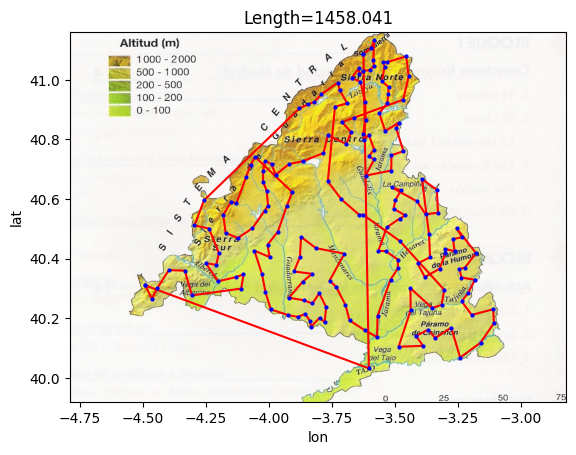

In [ ]:
def greedy(cities):
    '''
    Construye una solución "buenecilla" añadiendo en cada paso la ciudad más cercana de entre las que quedan por añadir.
    Para ello se emplea el método nearest().
    '''
    resultado = []
    no_visitados = cities.copy()

    # Inicializamos con una ciudad de partida:
    actual = no_visitados.pop(0)
    resultado.append(actual)

    # Hasta completar una solución, elegimos la ciudad más cercana de entre las que no se han visitado:
    while no_visitados:
        # Buscamos la ciudad más cercana:
        mas_cercano = nearest(actual, no_visitados)
        # Lo añadimos a la solución:
        resultado.append(mas_cercano)
        # Lo eliminamos de las ciudades no visitadas:
        no_visitados.remove(mas_cercano)
        # Actualizamos el valor actual:
        actual = mas_cercano

    return resultado

res = greedy(cities)
print(len(res))

draw(res)


### Búsqueda local

Mientras haya mejoras, explora el entorno de vecindad para ver si encuentra una solución mejor.
 * Puede ser first improvement o best improvement.

In [ ]:
def swap (p1, p2, l): # operador swap (intercambia dos ciudades en las posiciones p1 y p2)
    res = l[:] # copy the list
    res[p1], res[p2] = l[p2], l[p1]
    return res

In [18]:
from itertools import combinations

# La vecindad es el conjunto de todos los movimientos posbiles en 1 paso:
def vecindad(estado, operador):
    # Calcula la vecindad completa del estado aplicando el operador.
    n = len(estado)

    # Aplicamos el operador a todos los pares posibles:
    vecinos = [operador(i, j, estado) for i, j in combinations(range(n), 2)]
    return vecinos


# Opcion menos eficiente (Tarda mucho: ~4 minutos)
def local_search (state, fn, fnh, best_improvement=False, max_iter=300):
    '''Búsqueda local
    state: solución de partida (aleatoria o utilizando un método constructivo).
    fn: función de evaluación (a minimizar).
    fnh: función de creación del entorno de vecindad.
    '''

    # Definimos estado y valor inicial
    solucion_actual = state
    coste_actual = fn(solucion_actual)
    mejora = True


    # Mientras mejoremos, continuamos
    while mejora:
        mejora = False
        # Calculamos vecinos
        vecinos = fnh(solucion_actual, swap)

        # Algoritmo Best improvement
        if best_improvement:
            # Inicalizamos
            mejor_vecino = None
            mejor_coste = coste_actual

            # Recorremos toda la vecindad
            for vecino in vecinos:
                coste_vecino = fn(vecino)

                if coste_vecino < mejor_coste:
                    mejor_coste = coste_vecino
                    mejor_vecino = vecino
            # Cogemos el que aporta una mejora mayor
            if mejor_vecino is not None:
                solucion_actual = mejor_vecino
                coste_actual = mejor_coste
                mejora = True

        # Algoritmo First Improvement
        else:
            for vecino in vecinos:
                coste_vecino = fn(vecino)
                if coste_vecino < coste_actual:
                    solucion_actual = vecino
                    coste_actual = coste_vecino
                    mejora = True
                    # Paramos tras haber encontrado la primera mejora
                    break
    return solucion_actual


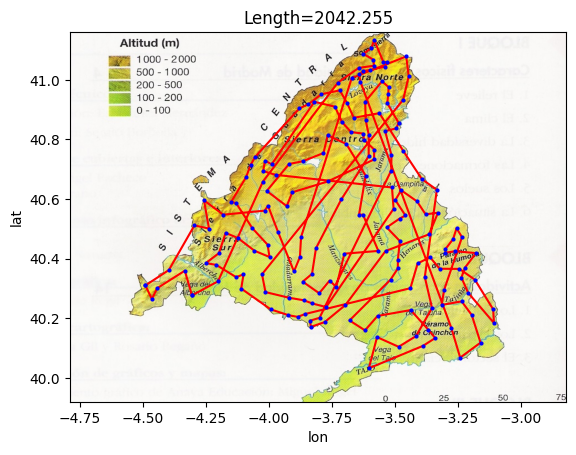

In [19]:
import random
random.shuffle(cities)

sol = local_search(cities, globaldist, vecindad, best_improvement=False)
draw(sol)

In [14]:
# Otra opción más eficiente:

from itertools import combinations
from copy import deepcopy

# Movimiento 2-opt: invierte el subtrayecto entre i y j
def dos_opt(ruta, i, j):
    nueva_ruta = ruta[:]
    nueva_ruta[i:j+1] = reversed(ruta[i:j+1])
    return nueva_ruta

# Función mucho más eficiente (O(1)) que calcula el coste de una ruta (solo usando 2-opt):
def delta_2opt(ruta, i, j, coste_actual):
    '''Calcula el coste de una ruta antes de usar 2-opt'''
    a = ruta[i - 1] # El lugar anterior a la subruta que va a ser revertida.
    b = ruta[i] # El lugar donde comienza la reversión de la subruta.
    c = ruta[j] # El lugar donde finaliza la reversión de la subruta.
    d = ruta[(j + 1) % len(ruta)] # El lugar posterior a la subruta que va a
                                  # ser revertida. Para prevenir el IndexError
                                  # se realiza un wrap-around, donde en caso de que
                                  # j=len(ruta), j + 1 = 0 (la ruta es circular).

    delta = (dist(a, c) + dist(b, d)) - (dist(a, b) + dist(c, d))
    return coste_actual + delta

def vecindad_2opt(estado, operador, coste_actual):
    # Calcula la vecindad completa del estado aplicando el operador.
    n = len(estado)
    vecinos = []

    # Aplicamos el operador a todos los pares válidos:
    for i, j in combinations(range(n), 2):
        # Aseguramos que i < j (aunque combinations ya lo hace) y que no son adyacentes
        # El caso j == i + 1 no es un movimiento 2-opt válido.
        # Tampoco el caso donde se conecta el primero con el último (i=0, j=n-1)
        if j > i + 1 and not (i == 0 and j == n - 1):
            vecinos.append((operador(estado, i, j), delta_2opt(estado, i, j, coste_actual)))

    return vecinos


def local_search_2opt(state, fn, fnh, best_improvement=False, max_iter=300):
    '''Búsqueda local
    state: solución de partida (aleatoria o utilizando un método constructivo).
    fn: función de evaluación (a minimizar).
    fnh: función de creación del entorno de vecindad.
    best_improvement: si usa estrategia first_improvement o best_improvement
    '''

    # Definimos estado y valor inicial:
    solucion_actual = state
    coste_actual = fn(solucion_actual)
    mejora = True

    i = 0

    # Mientras mejore, continuamos:
    while mejora and i < max_iter:
        i += 1
        mejora = False

        # Calculamos vecinos:
        vecinos = fnh(solucion_actual, dos_opt, coste_actual)

        # Algoritmo Best improvement:
        if best_improvement:
            # Inicalizamos:
            mejor_vecino = None
            mejor_coste = coste_actual

            # Recorremos toda la vecindad
            for vecino in vecinos:
                coste_vecino = vecino[1]

                if coste_vecino < mejor_coste:
                    mejor_coste = coste_vecino
                    mejor_vecino = vecino[0]

            # Cogemos el que aporta una mejora mayor:
            if mejor_vecino is not None:
                solucion_actual = mejor_vecino
                coste_actual = mejor_coste
                mejora = True

        # Algoritmo First Improvement
        else:
            for vecino in vecinos:
                coste_vecino = vecino[1]
                if coste_vecino < coste_actual:
                    solucion_actual = vecino[0]
                    coste_actual = coste_vecino
                    mejora = True
                    # Paramos tras haber encontrado la primera mejora:
                    break

    return solucion_actual, coste_actual

Usando 179 ciudades
Coste inicial: 1521.892754595684
Coste final: 1208.3208863720943  |  Mejora: 20.60%


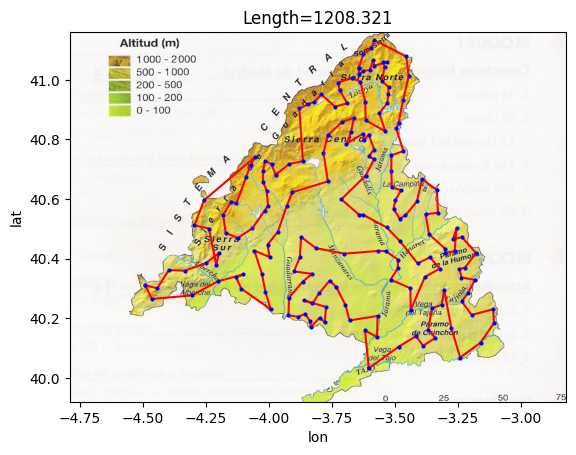

In [15]:
import random
random.shuffle(cities)
cities = [tuple(c) for c in cities]

usar_subconjunto = False # True usa solo parte de las ciudades
tam_subconjunto = 100 # Número de ciudades si se usa subconjunto

ciudades = random.sample(cities, min(tam_subconjunto, len(cities))) if usar_subconjunto else cities

print(f"Usando {len(ciudades)} ciudades")

# Se parte de una solución inicial generada por el algoritmo greedy:
ruta_inicial = greedy(ciudades)
coste_inicial = globaldist(ruta_inicial)
print(f"Coste inicial: {coste_inicial}")

# Llamar a local_search y desempaquetar los resultados:
sol, cost = local_search_2opt(ruta_inicial, globaldist, vecindad_2opt, best_improvement=True, max_iter=1000)

print(f"Coste final: {cost}  |  Mejora: {(coste_inicial-cost)/coste_inicial*100:.2f}%")

draw(sol)

La solución encontrada depende del tipo de movimiento que elijamos, y para cada problema puede haber varios, siendo unos mejores que otros.

Para el TSP se recomienda utilizar el operador two-opt, que elige dos puntos al azar e invierte la cadena entre esos dos puntos.

### Iterated Local Search

 * Metaheurística que combina búsqueda local y perturbaciones aleatorias para escapar de óptimos locales.
 * Se usa 2-opt como método de mejora y una sacudida controlada por el parámetro apl_sacudida para ampliar la búsqueda.

In [16]:
# Perturbación sencilla -> aplicar 2-opt en posición aleatoria:
def sacudir(ruta, apl_sacudida=2):
    n = len(ruta)
    nueva = ruta[:]
    for _ in range(apl_sacudida):
        i = random.randint(0, n - 2)
        j = random.randint(i + 1, n - 1)
        nueva = dos_opt(nueva, i, j)
    return nueva

# ILS con 2-opt:
def ils_2opt(state, fn, fnh, best_improvement=False, max_iter=100, iteraciones=50, apl_sacudida=2):
    # Mejoramos la ruta inicial con 2-opt:
    mejor, mejor_coste = local_search_2opt(state, fn, fnh, best_improvement=best_improvement, max_iter=max_iter)
    actual = mejor[:] # Punto de partida para las sacudidas.

    for _ in range(iteraciones):

        if _ % 10 == 0: # Print para saber que está progresando durante la ejecución.
            print(f"Iteración {_} / {iteraciones} – coste: {mejor_coste:.3f}")

        # Exploramos sacudiendo la ruta actual:
        candidato = sacudir(actual, apl_sacudida=apl_sacudida)

        # Mejoramos el candidato con 2-opt:
        actual, coste_actual = local_search_2opt(candidato, fn, fnh, best_improvement=best_improvement, max_iter=max_iter)

        # Nos quedamos con el mejor hasta el momento:
        if coste_actual < mejor_coste:
            mejor, mejor_coste = actual, coste_actual
            actual = mejor[:] # Seguimos explorando desde el nuevo mejor.
        else:
            actual = mejor[:] # Si no mejora, volvemos al mejor conocido.

    return mejor, mejor_coste



__Prueba del ILS con opción de subconjunto.__
* Código para probar el algoritmo Iterated Local Search usando 2-opt.
* Se parte de una solución inicial generada con el algoritmo voraz y se aplican iteraciones de búsqueda local y sacudidas controladas por el parámetro apl_sacudida para comparar el coste inicial y final de la ruta.
* Permite ejecutar el algoritmo con todas las ciudades o con una muestra aleatoria (usar_subconjunto=True) para reducir el tiempo de cálculo, se usará también este método en las siguientes funciones.

Usando 40 ciudades
Coste inicial: 598.6516814118579
Iteración 0 / 30 – coste: 584.941
Iteración 10 / 30 – coste: 572.040
Iteración 20 / 30 – coste: 558.429
Coste final: 558.4291791052107  |  Mejora: 6.72%


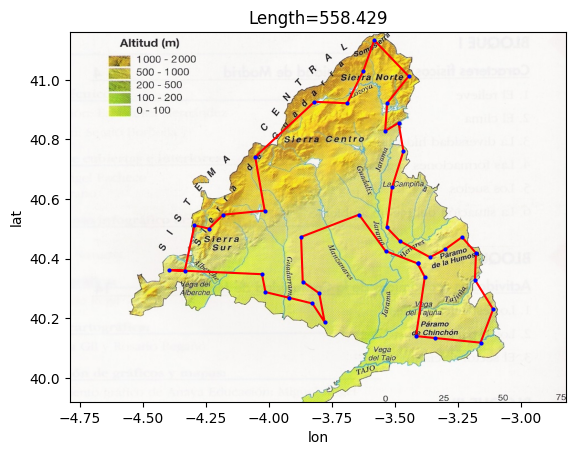

In [17]:
# Prueba de ILS

import random

usar_subconjunto = True # True usa solo parte de las ciudades
tam_subconjunto = 40 # Número de ciudades si se usa subconjunto

ciudades = random.sample(cities, min(tam_subconjunto, len(cities))) if usar_subconjunto else cities
print(f"Usando {len(ciudades)} ciudades")

# Se parte de una solución inicial generada por el algoritmo greedy:
ruta_inicial = greedy(ciudades)
coste_inicial = globaldist(ruta_inicial)
print(f"Coste inicial: {coste_inicial}")

ruta_mejor, coste_final = ils_2opt(ruta_inicial, globaldist, vecindad_2opt, max_iter=100, iteraciones=30, apl_sacudida=2)

print(f"Coste final: {coste_final}  |  Mejora: {(coste_inicial-coste_final)/coste_inicial*100:.2f}%")

draw(ruta_mejor)


### Temple simulado

* Metaheurística basada en búsqueda local que permite aceptar, con cierta probabilidad, movimientos que empeoran la solución para escapar de óptimos locales.
* Usa un parámetro de “temperatura” que va disminuyendo: al principio explora más (acepta más empeoramientos) y al final explota la mejor zona encontrada (acepta casi solo mejoras).


In [ ]:
import random
import math

def temple_simulado(ruta_inicial,
                    funcion_coste,
                    iteraciones_por_temperatura=200,
                    temperatura_inicial=1000.0,
                    temperatura_minima=1e-3,
                    factor_enfriamiento=0.99):
    """
    Temple simulado para el TSP usando movimientos 2-opt.
    """

    # Estado actual
    ruta_actual = ruta_inicial[:]
    coste_actual = funcion_coste(ruta_actual)

    # Mejor solución encontrada
    mejor_ruta = ruta_actual[:]
    mejor_coste = coste_actual

    T = temperatura_inicial

    while T > temperatura_minima:
        for _ in range(iteraciones_por_temperatura):
            # Elegimos dos posiciones al azar para aplicar 2-opt
            i = random.randint(0, len(ruta_actual) - 2)
            j = random.randint(i + 1, len(ruta_actual) - 1)

            # Generamos vecino con 2-opt
            ruta_vecina = dos_opt(ruta_actual, i, j)
            coste_vecino = funcion_coste(ruta_vecina)

            delta = coste_vecino - coste_actual

            # Si mejora, aceptamos siempre
            if delta < 0:
                ruta_actual = ruta_vecina
                coste_actual = coste_vecino
            else:
                # Si empeora, aceptamos con cierta probabilidad
                prob_aceptacion = math.exp(-delta / T)
                if random.random() < prob_aceptacion:
                    ruta_actual = ruta_vecina
                    coste_actual = coste_vecino

            # Actualizamos mejor solución global
            if coste_actual < mejor_coste:
                mejor_ruta = ruta_actual[:]
                mejor_coste = coste_actual

        # Enfriamiento
        T *= factor_enfriamiento

    return mejor_ruta, mejor_coste


Coste inicial (greedy): 868.2381255130078
Coste final (temple simulado): 568.105339543145
Mejora: 34.57%


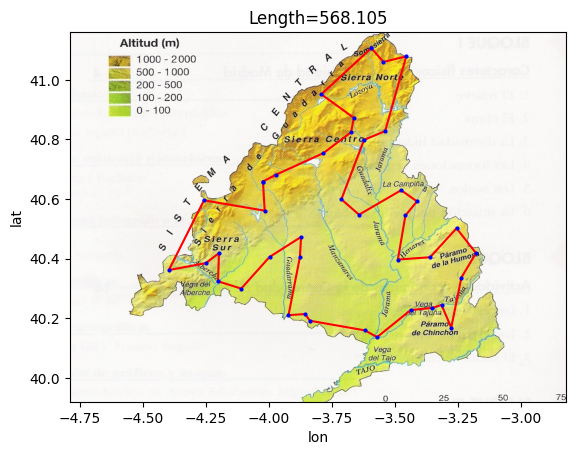

In [ ]:
# Ejemplo de uso del temple simulado
usar_subconjunto = True
tam_subconjunto = 40

ciudades = random.sample(cities, min(tam_subconjunto, len(cities))) if usar_subconjunto else cities

ruta_inicial = greedy(ciudades)
coste_inicial = globaldist(ruta_inicial)
print("Coste inicial (greedy):", coste_inicial)

ruta_ts, coste_ts = temple_simulado(ruta_inicial, globaldist,
                                    iteraciones_por_temperatura=200,
                                    temperatura_inicial=1000.0,
                                    temperatura_minima=1e-3,
                                    factor_enfriamiento=0.995)

print("Coste final (temple simulado):", coste_ts)
print(f"Mejora: {(coste_inicial - coste_ts) / coste_inicial * 100:.2f}%")

draw(ruta_ts)


### Búsqueda GRASP

* Metaheurística multi–arranque que combina una fase constructiva semi-greedy con una fase de búsqueda local para mejorar cada solución inicial.
* En cada iteración construye una ruta añadiendo ciudades elegidas aleatoriamente de una lista restringida de candidatos (RCL), la mejora con 2-opt y se queda con la mejor solución histórica.


In [ ]:
import random

def greedy_grasp(ciudades, k=3):
    """
    Versión semi-greedy del algoritmo voraz para TSP.
    En cada paso:
      - Se calculan las distancias a todas las ciudades no visitadas.
      - Se ordenan por distancia.
      - Se construye una RCL con las k más cercanas.
      - Se elige una al azar de la RCL.
    """

    # Copiamos las ciudades para no modificar la lista original
    no_visitadas = ciudades.copy()
    solucion = []

    # Elegimos ciudad inicial
    ciudad_actual = no_visitadas.pop(0)
    solucion.append(ciudad_actual)

    while no_visitadas:
        # Calculamos (ciudad, distancia) a todas las no visitadas
        lista_distancias = []
        for ciudad in no_visitadas:
            d = dist(ciudad_actual, ciudad)
            lista_distancias.append((ciudad, d))

        # Ordenamos por distancia creciente
        lista_distancias.sort(key=lambda x: x[1])

        # Construimos la RCL con las k más cercanas (o menos si no hay tantas)
        k_real = min(k, len(lista_distancias))
        rcl = lista_distancias[:k_real]

        # Elegimos una ciudad al azar de la RCL
        ciudad_elegida, _ = random.choice(rcl)

        # Actualizamos solución y listas
        solucion.append(ciudad_elegida)
        no_visitadas.remove(ciudad_elegida)
        ciudad_actual = ciudad_elegida

    return solucion

def grasp_tsp(ciudades,
              num_iteraciones=50,
              k=3,
              max_iter_busqueda_local=200,
              usar_best_improvement=True):
    """
    GRASP para el TSP:
      - Fase constructiva: greedy_grasp (semi-greedy).
      - Fase de mejora: búsqueda local 2-opt (local_search_2opt).
      - Se repite varias veces y se devuelve la mejor solución histórica.
    """

    mejor_ruta_global = None
    mejor_coste_global = float("inf") # En la primera iteración, cuando obtengas coste_mejorado, siempre será menor que float("inf")

    for iteracion in range(num_iteraciones):
        # Fase semi-greedy (construcción)
        ruta_inicial = greedy_grasp(ciudades, k=k)
        coste_inicial = globaldist(ruta_inicial)

        # Fase de búsqueda local (2-opt)
        ruta_mejorada, coste_mejorado = local_search_2opt(
            ruta_inicial,
            globaldist,
            vecindad_2opt,
            best_improvement=usar_best_improvement,
            max_iter=max_iter_busqueda_local
        )

        # Actualizamos mejor solución global
        if coste_mejorado < mejor_coste_global:
            mejor_coste_global = coste_mejorado
            mejor_ruta_global = ruta_mejorada[:]

        # (Opcional) mostrar algo de información
        if (iteracion + 1) % 10 == 0:
            print(f"Iteración GRASP {iteracion + 1}/{num_iteraciones} | "
                  f"Coste actual: {coste_mejorado:.2f} | Mejor global: {mejor_coste_global:.2f}")

    return mejor_ruta_global, mejor_coste_global


Usando 50 ciudades
Iteración GRASP 10/50 | Coste actual: 697.58 | Mejor global: 618.46
Iteración GRASP 20/50 | Coste actual: 625.93 | Mejor global: 609.94
Iteración GRASP 30/50 | Coste actual: 663.37 | Mejor global: 609.94
Iteración GRASP 40/50 | Coste actual: 621.03 | Mejor global: 609.94
Iteración GRASP 50/50 | Coste actual: 640.14 | Mejor global: 609.94
Coste final (GRASP): 609.9402200105687


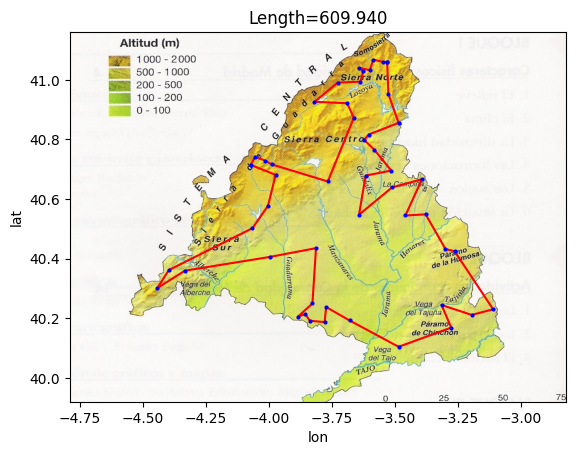

In [ ]:
# Ejemplo de uso de GRASP
usar_subconjunto = True
tam_subconjunto = 50

ciudades = random.sample(cities, min(tam_subconjunto, len(cities))) if usar_subconjunto else cities
print(f"Usando {len(ciudades)} ciudades")

ruta_grasp, coste_grasp = grasp_tsp(
    ciudades,
    num_iteraciones=50,
    k=3,
    max_iter_busqueda_local=200,
    usar_best_improvement=True
)

print("Coste final (GRASP):", coste_grasp)
draw(ruta_grasp)
